In [ ]:
import pandas as pd
import os
import cufflinks as cf
cf.go_offline(connected=False)
import numpy as np

In [ ]:
df = pd.read_csv('data/BATS SLV, 1D.csv',index_col='time')
df.index = pd.to_datetime(df.index,unit='s')
df['volume'] = df['Volume']
df       = df[['open','high','low','close','volume']]

df.head()

In [ ]:
#df = df[-300:]
df

# Add Weekly Time Frame Awareness to Daily Data

In [ ]:
from finding_fire import add_weekly

In [ ]:
add_weekly(df,add_indicators=True,plot = True)

In [ ]:
df.head()

# Higher Highs and Lower Lows Trend Map...

In [ ]:

from finding_fire import higher_highs_trendmap,hl

In [ ]:
higher_highs_trendmap(df,)
#hl(df)

In [ ]:
hl(df)

# Add hh_ Trend Map Indicator to weekly time frame!

### Starting over with fresh data

In [ ]:
df           = pd.read_csv('data/BATS SLV, 1D.csv',index_col='time')
df.index     = pd.to_datetime(df.index,unit='s')
df['volume'] = df['Volume']
df           = df[['open','high','low','close','volume']]
# shorten dataframe for time sake...
df           = df[-300:]

# all you have to do to add a custom indicator to weekly is:
### pass the function into the 'other_indicator_function_param'
- in this case we pass the hhll_trendmap

In [ ]:
other_indicator_function= higher_highs_trendmap
add_weekly(df,add_indicators=False,plot=True,other_indicator_function=other_indicator_function)

In [ ]:
df['datee'] = df.index.date

In [ ]:
hl(df)

In [ ]:
df.head(1)

In [ ]:
pd.set_option('display.max_columns',None)

# add daily trendmap things

In [ ]:
higher_highs_trendmap(df)

In [ ]:
hl(df)

# daily trendmap inside of weekly trendmap

In [ ]:
df[['week_last_high_and_last_low_higher_scale','close','last_high_and_last_low_higher_scale']].iplot(theme='solar',fill=True,title='# daily trendmap inside of weekly trendmap')

In [ ]:
df[['week_last_high_and_last_low_higher_scale','close']].iplot(theme='solar',fill=True)

In [ ]:
results = []

# Backtest

In [ ]:
from finding_fire import pct_targets,one_stop

In [ ]:
df['buy']  = (df['trend_change_up'] == True) & ( df['trend_change_up'].shift() == False)
pct_targets(df,up_pct=3,dn_pct=1,plot=False)
result     = one_stop(df,strat_name = 'SHORT Trend Change')
result[['wins','loss']].sum().plot(kind='pie')
results.append(result)

In [ ]:

#hl(df)

# Now Compare To Weekly 

df['buy']  = (df['trend_change_up'] == True) & ( df['trend_change_up'].shift() == False) & (df['week_last_high_and_last_low_higher']== True)
pct_targets(df,up_pct=3,dn_pct=1,plot=False)
if len(df[df['buy']==True]) > 0:
    result     = one_stop(df,strat_name = 'SHORT - Trend Change - with week condition')
    result[['wins','loss']].sum().plot(kind='pie')
    results.append(result)
#hl(df)

# now we can do the same for a short plot

In [ ]:
from finding_fire import short_frame

In [ ]:
df = df[['open','high','close','low','volume']]
df

# Now its long...

In [ ]:
from finding_fire import sola
sola(df.drop('volume',axis=1))
short_frame(df)
sola(df.drop('volume',axis=1))

# Now Its Short ... 
- you can now preform backtest as if you going long. 
- no complication no mess it just works...

In [ ]:
add_weekly(df,other_indicator_function=higher_highs_trendmap)

In [ ]:
higher_highs_trendmap(df)

In [ ]:
df[['week_last_high_and_last_low_higher_scale','close','last_high_and_last_low_higher_scale']].iplot(theme='solar',fill=True,title='# daily trendmap inside of weekly trendmap')

In [ ]:
results = []

# BUY VS BUY in TELESCOPE

In [ ]:
from finding_fire import pct_targets,one_stop

In [ ]:
df['buy']  = (df['trend_change_up'] == True) & ( df['trend_change_up'].shift() == False)
pct_targets(df,up_pct=2,dn_pct=1,plot=False)
result     = one_stop(df,strat_name = 'SHORT Trend Change')
result[['wins','loss']].sum().plot(kind='pie')
results.append(result)
#hl(df)

# Now Compare To Weekly 

In [ ]:
df['buy']  = (df['trend_change_up'] == True) & ( df['trend_change_up'].shift() == False) & (df['week_last_high_and_last_low_higher']== True)
pct_targets(df,up_pct=2,dn_pct=1,plot=False)
if len(df[df['buy']==True]) > 0:
    result     = one_stop(df,strat_name = 'SHORT - Trend Change - with week condition')
    result[['wins','loss']].sum().plot(kind='pie')
    results.append(result)
#hl(df)

In [ ]:
stop = 

In [ ]:
import pandas_ta as pta
def sola(df,title=None):
    return df.iplot(theme='solar',fill=True,title=title)

def hl(df):
    def highlight(boo):
        criteria = boo == True
        return [ 'background-color: green' if i else '' for i in criteria]
    df = df.style.apply(highlight)
    return df


def indicator_adder(df):
    '''
    this adds the most common indicators to a dataframe
    with lower case close open high low volume
    takes: dataframe
    returns : dataframe
    '''
    df['rsi'] = pta.rsi(df.close)
    df['vwap'] = pta.vwap(df.high,df.low,df.close,df.volume)
    df[['stoch_k','stoch_d']] = pta.stoch(df.high,df.low,df.close)
    if len(df)>20:
        df['ema'] = pta.ema(df.close,length=20)
    df['rsi'] = pta.rsi(df.close,length=2)
    #if len(df)>6:
        #df        = super_trend(df)
    return df

In [ ]:
df.tail()

df['year'] = df.index.year
df.head()

df['week_year'] = df['year'].astype(str)+ '-'+ df['week'].astype(str)
df

df.groupby('week_year').agg('last')#.sort_values('date')
#df

# This is ready to be a function 
## Except:
##  >>> close and open are the same for some reason
## >>> they are all using low

In [ ]:
df.groupby('week_year').agg('last').sort_values('date')#['close']

In [ ]:


week_high= df.groupby('week_year').agg('max')['high']
week_low = df.groupby('week_year').agg('min')['low']
week_close=df.groupby('week_year').agg('last').sort_values('date')['close']
week_open =df.groupby('week_year').agg('first').sort_values('date')['open']
week_date =df.groupby('week_year').agg('last')['date']
week_volume=df.groupby('week_year').agg('sum')['volume']

week_columns= [week_high,week_low,week_close,week_open,week_volume,week_date]
week_df = pd.DataFrame(week_columns).T
week_df = week_df.sort_values('date')
#week_df  = indicator_adder(week_df)
week_df


from tqdm import trange



for col in week_df.drop('date',axis=1).columns:
    week_df[col] = week_df[col].shift()
    new_col = 'week_'+col
    print(new_col)
    df[new_col] = 0.0
    for i in trange(1,len(df)):
        week_year = df['week_year'][i]
        df[new_col][i] = week_df[col][week_year]
    

sola(df[['low','high','week_low','week_high']])

sola(df[['week_open','week_close','open','close']])

In [ ]:
df 

In [ ]:
df = df[['open','high','low','close']]
df

In [ ]:
df['riz'] = pta.rsi(df.close,legnth=2)
df['up_corn'] = (df['riz']>df['riz'].shift()) & ( df['riz'].shift()<df['riz'].shift(2))
df['dn_corn'] = (df['riz']<df['riz'].shift()) & ( df['riz'].shift()>df['riz'].shift(2))
hl(df)

In [ ]:
df['last_up_corn'] = 0.0
df['last_dn_corn'] = 0.0
df['higher_low']   = False
df['higher_high']  = False
df['lower_high']   = False
df['lower_low']    = False

for i in trange(1,len(df)):
    if df['up_corn'][i] == True:
        df['last_up_corn'][i] = df['close'][i]
    else:
        df['last_up_corn'][i] = df['last_up_corn'][i-1]
    if df['dn_corn'][i] == True:
        df['last_dn_corn'][i] = df['close'][i]
    else:
        df['last_dn_corn'][i] = df['last_dn_corn'][i-1]
    
    if (df['up_corn'][i] == True) & (df['last_up_corn'][i] > df['last_up_corn'][i-1]):
        df['higher_low'][i] = True
    if (df['dn_corn'][i] == True) & (df['last_dn_corn'][i] > df['last_dn_corn'][i-1]):
        df['higher_high'][i] = True
    
    if (df['up_corn'][i]==True) & (df['higher_low'][i]==False):
        df['lower_low'][i] = True
    if (df['dn_corn'][i] == True) & (df['higher_high'][i] == False):
        df['lower_high'][i] = True
    
    #if
        

In [ ]:
hl(df)

In [ ]:
df['last_high_was_higher'] = False
for i in trange(len(df)):
    if df['higher_high'][i] == True:
        df['last_high_was_higher'][i] = True
    elif df['lower_high'][i] == True:
        df['last_high_was_higher'][i] = False
    else:
        df['last_high_was_higher'][i] = df['last_high_was_higher'][i-1]
        
df['last_high_was_lower'] = ( df['last_high_was_higher'] == False)     
        
hl(df)

In [ ]:
df['last_low_was_higher'] = False
for i in trange(len(df)):
    if df['higher_low'][i] == True:
        df['last_low_was_higher'][i] = True
    elif df['higher_low'][i] == True:
        df['last_low_was_higher'][i] = False
    else:
        df['last_low_was_higher'][i] = df['last_low_was_higher'][i-1]

In [ ]:
df['last_low_was_lower'] = False
for i in trange(len(df)):
    if df['lower_low'][i] == True:
        df['last_low_was_lower'][i] = True
    elif df['higher_low'][i] == True:
        df['last_low_was_lower'][i] = False
    else:
        df['last_low_was_lower'][i] = df['last_low_was_lower'][i-1]#.......................................................
        
df['closee'] = df['close']  
df['last_high_and_last_low_higher'] = (df['last_high_was_higher']==True) & (df['last_low_was_higher']==True)
df['last_low_was_higher'] = df['last_low_was_lower'] == False        
hl(df)



In [ ]:
df['trend_change'] = df['last_high_and_last_low_higher'] != df['last_high_and_last_low_higher'].shift()#...........................
df['trend_change_up'] = (df['trend_change']==True) & ( df['last_high_and_last_low_higher']==True)
df['datee']           = df.index.date



# isolate switches for research

In [ ]:
#switch df
sdf = df[df['trend_change']==True]
sdf['change_diff'] = df['close'].shift() - df['close'] 
hl(sdf)

In [ ]:
sdf.groupby('trend_change_up').agg('mean')['change_diff'].iplot(theme='solar',kind='bar',title='mean difference between trend changes')#
sdf.groupby('trend_change_up').agg('sum')['change_diff'].iplot(theme='solar',kind='bar',title=' sum difference between trend changes')#
sdf.groupby('trend_change_up').agg('mean')

In [ ]:
from finding_fire import one_stop ,pct_targets


In [ ]:
#def buy_trend_change(df,up_pct,dn_pct)
df['buy']  = (df['trend_change_up'] == True) & ( df['trend_change_up'].shift() == False)
pct_targets(df,up_pct=20,dn_pct=5,plot=False)
results = one_stop(df,strat_name = 'FIRST Trend Change')
results[['wins','loss']].sum().plot(kind='pie')
#hl(df)

In [ ]:
results[['wins','loss']].sum().plot(kind='pie')

# making a short function

In [ ]:
from stealing_fire import sola

In [ ]:
def short_frame(df,plot=False):
    if plot == True:
        sola(df[['low','high']])

    #INVERT DATA
    big_num = df['high'].max()
    print(big_num)

    price_columns = ['open','low','high','close']
    for col in price_columns:
        df[col] = big_num - df[col]

    # swap high and low since we inverted
    df[['high','low']] = df[['low','high']]
    if plot = True:
        sola(df[['low','high']])

In [ ]:
#df#def buy_trend_change(df,up_pct,dn_pct)
df['buy']  = (df['trend_change_up'] == True) & ( df['trend_change_up'].shift() == False)
pct_targets(df,up_pct=20,dn_pct=5,plot=False)
result = one_stop(df,strat_name = 'FIRST Trend Change')
result[['wins','loss']].sum().plot(kind='pie')
results.append(result)
#hl(df)

# TURN WEEKLY THING INTO FUNCTION!!!!

# STRAT IDEAS!!!
### > as soon as last high and last low buy pct targets, 
- wait for smack target if sell ticket not hit
### > as soon as weekly hits off, go into smaller time frame
### > I NEED ONE RESULTS JORNAL - 
- RESEARCH JORN EVERYTHING GOES IN AND PARSE LATER 
- ALL RESERCH HUB
- give it a table of contents too!
### > maybe make research jorn a notebook so you can so all this cool shit!!!!!
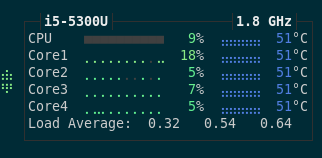
# FUCKING SICK I DIDNT KNOW I COULD ATTACH FUCKING PICTURES TO A NOTEBOOK THIS CHANGES EVERYTHING!!"